In [ ]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.8 MB/s 


In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 34.7 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [ ]:
!pip install mapclassify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline
import plotly.express as px
import geopandas
import mapclassify
import missingno as msno
po.init_notebook_mode(connected = True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EMSE 6574 Project/cleaned_data_2020.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head()

price  year manufacturer     model  ... size   type paint_color  state
0  10299  2012        acura        tl  ...  NaN  other        blue     nc
1   9500  2011       jaguar        xf  ...  NaN    NaN        blue     nc
2   3995  2004        honda   element  ...  NaN    SUV      orange     nc
3  12995  2015          kia  sportage  ...  NaN  wagon         NaN     nc
4  10995  2014    chevrolet  traverse  ...  NaN    SUV       black     nc

[5 rows x 15 columns]

# **I. Single Variables**

## 1. Features detail

In [ ]:
print('Numeric Features Details:\n')
print(f'Price Range: {min(df.price)}-{max(df.price)}')
print(f'Year Range: {min(df.year)}-{max(df.year)}')
print(f'Odometer Range: {min(df.odometer)}-{max(df.odometer)}')

Numeric Features Details:

Price Range: 311-83000
Year Range: 1990-2020
Odometer Range: 0.0-399961.0


In [ ]:
print('Categorical Features Details:\n')
print(f'Manufacturer: {df.manufacturer.unique()}\n Count: {df.manufacturer.nunique()}\n')
print(f'Model: {df.model.unique()}\n Count: {df.model.nunique()}\n')
print(f'Condition: {df.condition.unique()}\n Count: {df.condition.nunique()}\n')
print(f'Cylinders	: {df.cylinders.unique()}\n Count: {df.cylinders.nunique()}\n')
print(f'Fuel: {df.fuel.unique()}\n Count: {df.fuel.nunique()}\n')
print(f'Title Status: {df.title_status.unique()}\n Count: {df.title_status.nunique()}\n')
print(f'Transmission: {df.transmission.unique()}\n Count: {df.transmission.nunique()}\n')
print(f'Drive: {df.drive.unique()}\n Count: {df.drive.nunique()}\n')
print(f'Type: {df.type.unique()}\n Count: {df.type.nunique()}\n')
print(f'Paint Color: {df.paint_color.unique()}\n Count: {df.paint_color.nunique()}\n')
print(f'State: {df.state.unique()}\n Count: {df.state.nunique()}\n')

Categorical Features Details:

Manufacturer: ['acura' 'jaguar' 'honda' 'kia' 'chevrolet' 'bmw' 'toyota' 'nissan'
 'volkswagen' 'ford' 'gmc' 'subaru' 'ram' 'lexus' 'volvo' 'dodge' 'buick'
 'jeep' 'hyundai' 'mercedes-benz' 'cadillac' 'audi' 'infiniti' 'pontiac'
 'chrysler' 'rover' 'mazda' 'mini' 'mercury' nan 'fiat' 'harley-davidson'
 'saturn' 'mitsubishi' 'lincoln' 'tesla' 'alfa-romeo' 'aston-martin'
 'ferrari' 'porche' 'land rover' 'hennessey']
 Count: 41

Model: ['tl' 'xf' 'element' ... '2500 truck' 'van 1500 cargo'
 '3500 laramie megacab']
 Count: 27216

Condition: [nan 'excellent' 'good' 'fair' 'like new' 'salvage' 'new']
 Count: 6

Cylinders	: [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' '3 cylinders'
 '10 cylinders' 'other' '12 cylinders']
 Count: 8

Fuel: ['gas' 'diesel' nan 'hybrid' 'other' 'electric']
 Count: 5

Title Status: ['clean' 'salvage' 'rebuilt' 'lien' nan 'missing' 'parts only']
 Count: 6

Transmission: ['automatic' nan 'manual' 'other']
 Count: 3

Dri

## 2. Price distribution: is not normally distributed, and concentrates on 0-$100,000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


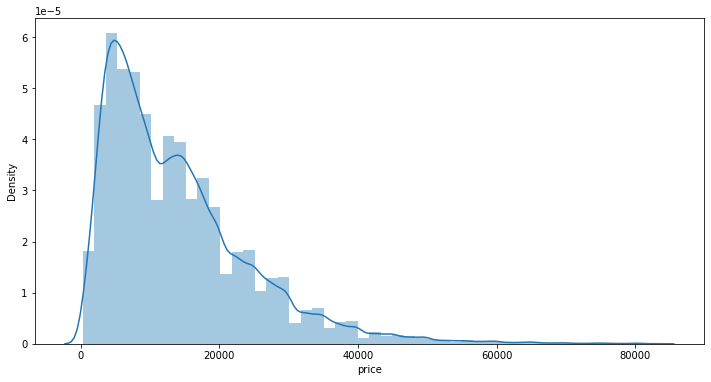

In [ ]:
fig=plt.figure(figsize=(12,6))
sns.distplot(df['price'])

## 3. Manufacturer: 
*   Top5 manufacturer by number of cars: Ford(45678), Chevrolet(35293), Toyota(24242), Honda(15513), Nissan(13140)

In [ ]:
df_m = df['manufacturer'].value_counts().reset_index()
df_m.columns = ['manufacturer','number']

Text(0.5, 1.0, 'Barplot of cars number with different manufacturers')

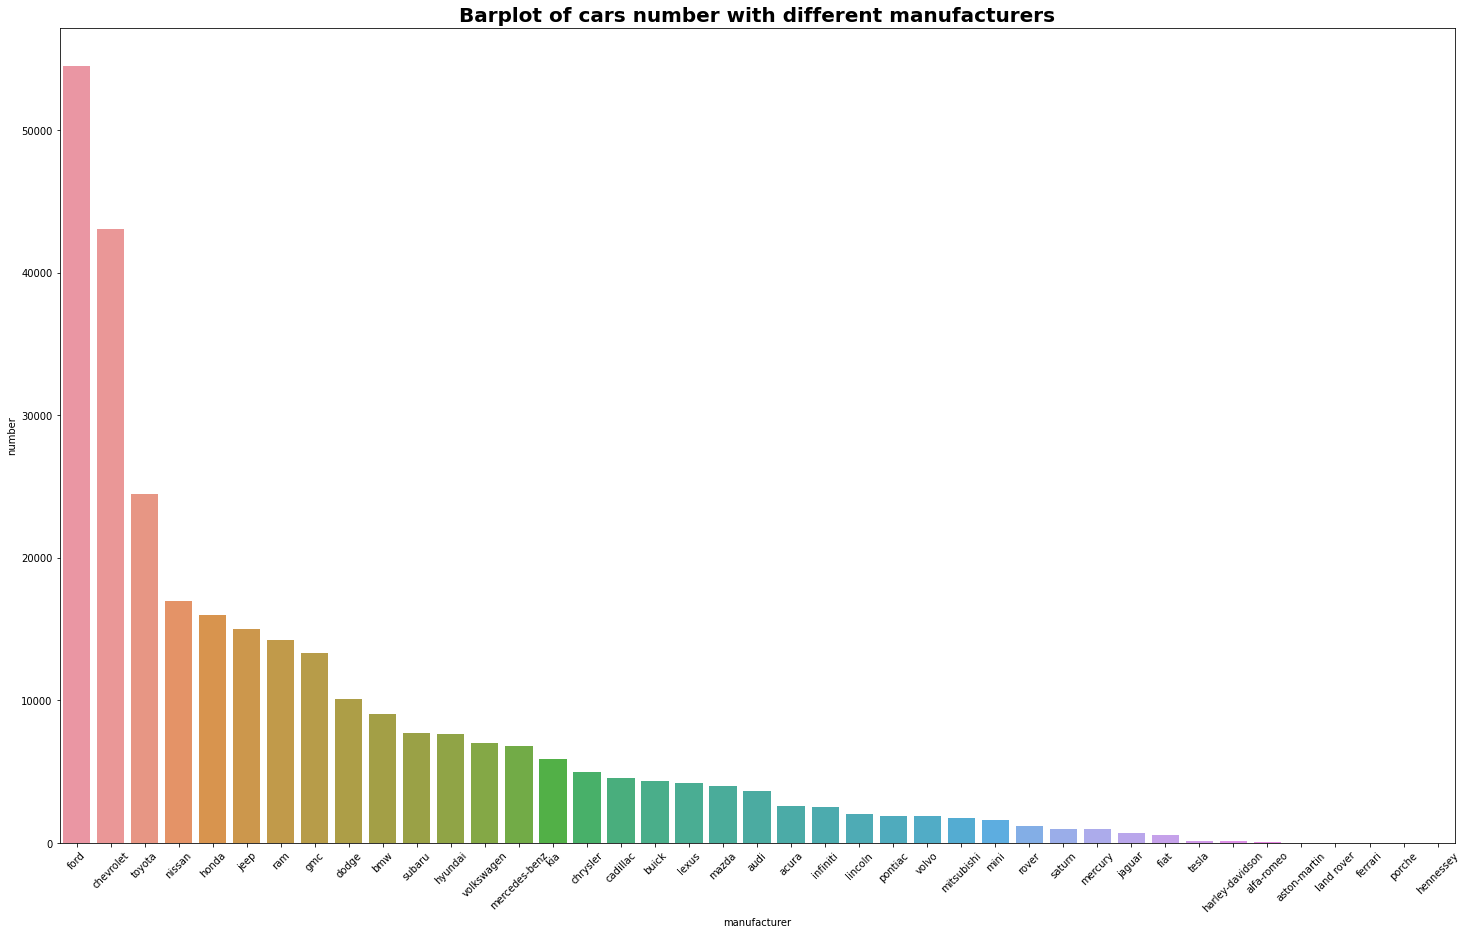

In [ ]:
fig=plt.figure(figsize=(25,15))
sns.barplot(x=df_m.manufacturer, y=df_m.number)
plt.xticks(rotation= 45)
plt.title('Barplot of cars number with different manufacturers',size=20, weight='bold')

*   The price of different manufacturers is shown as following boxplot:

In [ ]:
my_order = df.groupby(['manufacturer'])['price'].agg(['median']).sort_values(by='median').index

Text(0.5, 1.0, 'Boxplot of price with different manufacturers: sort by median price')

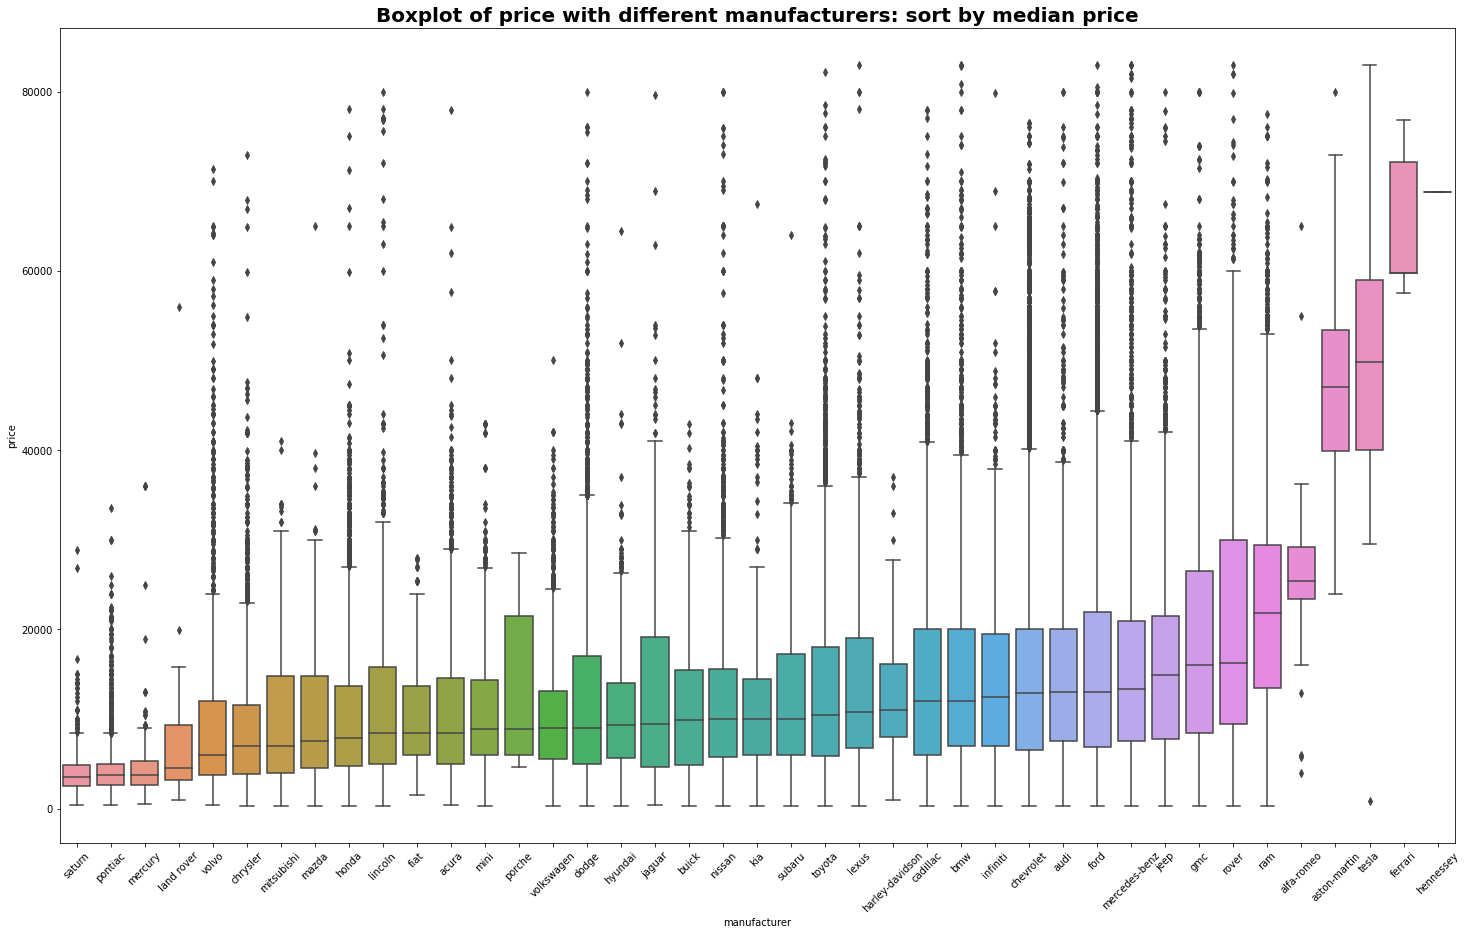

In [ ]:
fig=plt.figure(figsize=(25,15))
sns.boxplot(data=df, x=df['manufacturer'],y='price',order=my_order)
plt.xticks(rotation= 45)
plt.title('Boxplot of price with different manufacturers: sort by median price',size=20, weight='bold')

## 4. Odometer: generally speaking, the greater the mileage, the lower the price.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


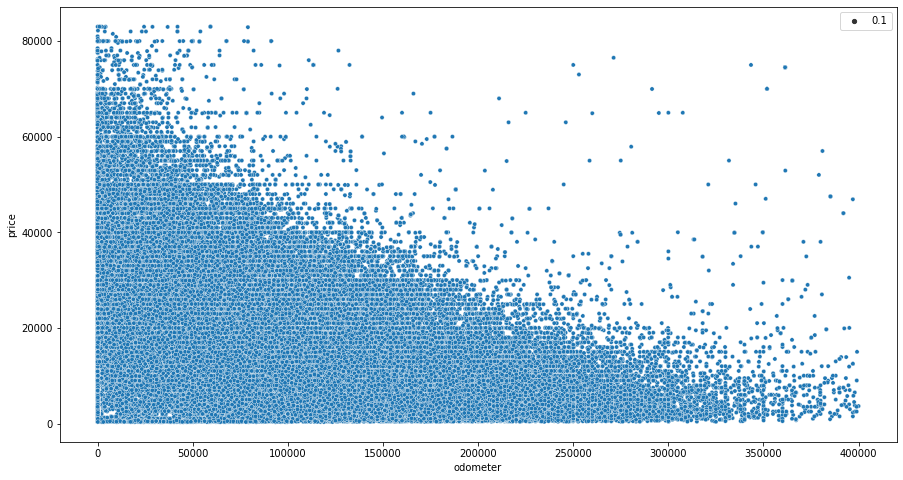

In [ ]:
fig=plt.figure(figsize=(15,8))
sns.scatterplot(df.odometer,df.price,size=0.1)

## 5. Year: over 60% of the cars are within the last 10 years.

In [ ]:
df_y = df['year'].value_counts().reset_index()
df_y.columns = ['year','number']
total_number = df['year'].count()

In [ ]:
def year_number(y):
  num = 0
  for i in df_y['year']:
    if i>(2021-y):
      num += df_y.loc[df_y['year']==i, 'number'].iloc[0]
  print(f'There are {num} cars for the last {y} years, which is {np.round(num/total_number*100,decimals=2)}% of the entire market.')      

year_number(5)
year_number(10)

There are 51240 cars for the last 5 years, which is 16.78% of the entire market.
There are 160951 cars for the last 10 years, which is 52.72% of the entire market.


## 6. Condition	& Cylinders	& Fuel &	Status & Transmission	& Drive	 & Size	& Type & Color

In [ ]:
df_condition = pd.DataFrame(df['condition'].dropna(inplace=False))
df_cylinders = pd.DataFrame(df['cylinders'].dropna(inplace=False))
df_fuel = pd.DataFrame(df['fuel'].dropna(inplace=False))

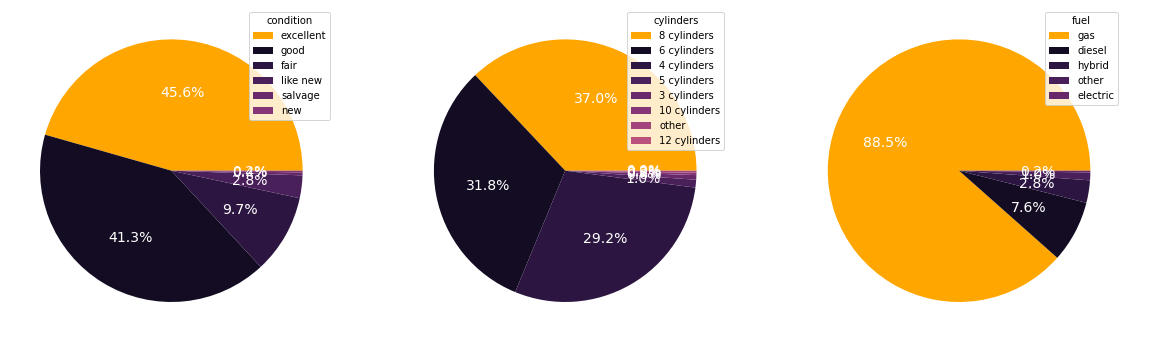

In [ ]:
color = ['#ffa600','#130c23','#2c1641','#49205a','#68296b','#863576','#a2437c','#b9537e','#cc6680','#e17c83','#e5ac93','#e8c4a4','#ecdbbd','#f2eedb']
font1 = {'fontsize': 14, 'color': 'w'}
fig=plt.figure(figsize=(20,16))
plt.subplot(1,3,1)
plt.pie(df_condition['condition'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_condition['condition'].unique())
plt.legend(loc='upper right', title='condition')
plt.subplot(1,3,2)
plt.pie(df_cylinders['cylinders'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_cylinders['cylinders'].unique())
plt.legend(loc='upper right', title='cylinders')
plt.subplot(1,3,3)
plt.pie(df_fuel['fuel'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_fuel['fuel'].unique())
plt.legend(loc='upper right', title='fuel')

In [ ]:
df_title_status = pd.DataFrame(df['title_status'].dropna(inplace=False))
df_transmission = pd.DataFrame(df['transmission'].dropna(inplace=False))
df_drive = pd.DataFrame(df['drive'].dropna(inplace=False))

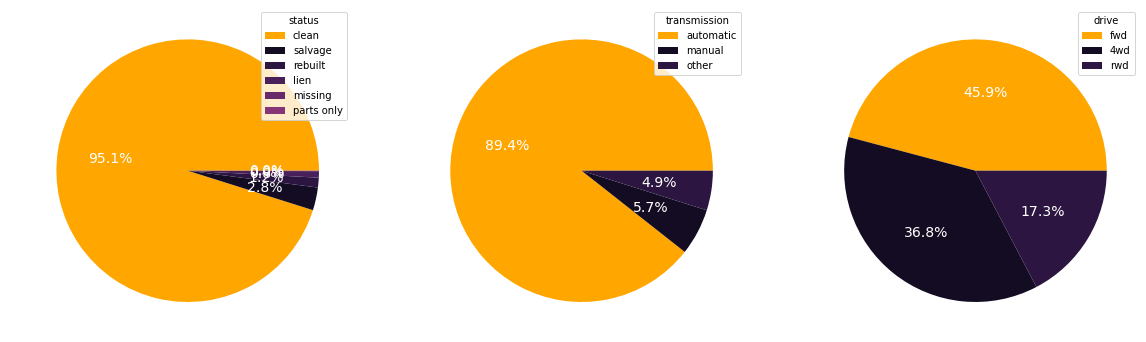

In [ ]:
fig=plt.figure(figsize=(20,16))
plt.subplot(1,3,1)
plt.pie(df_title_status['title_status'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_title_status['title_status'].unique())
plt.legend(loc='upper right', title='status')
plt.subplot(1,3,2)
plt.pie(df_transmission['transmission'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_transmission['transmission'].unique())
plt.legend(loc='upper right', title='transmission')
plt.subplot(1,3,3)
plt.pie(df_drive['drive'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_drive['drive'].unique())
plt.legend(loc='upper right', title='drive')

In [ ]:
df_size = pd.DataFrame(df['size'].dropna(inplace=False))
df_type = pd.DataFrame(df['type'].dropna(inplace=False))
df_paint_color = pd.DataFrame(df['paint_color'].dropna(inplace=False))

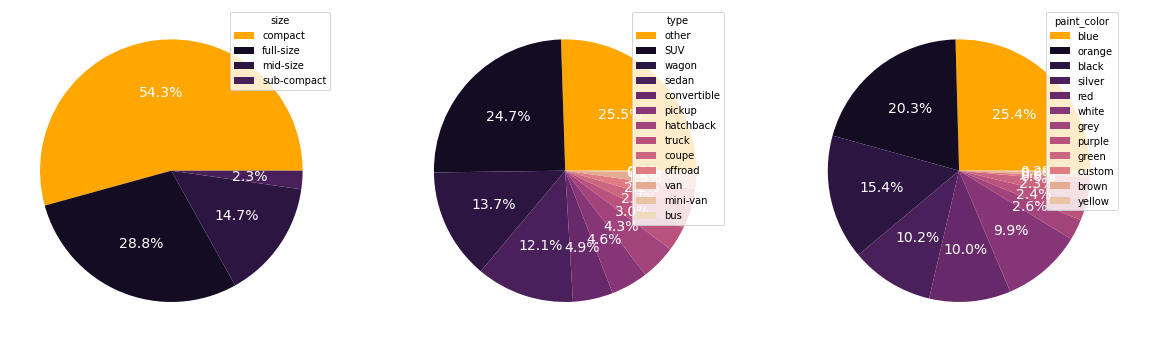

In [ ]:
fig=plt.figure(figsize=(20,16))
plt.subplot(1,3,1)
plt.pie(df_size['size'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_size['size'].unique())
plt.legend(loc='upper right', title='size')
plt.subplot(1,3,2)
plt.pie(df_type['type'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_type['type'].unique())
plt.legend(loc='upper right', title='type')
plt.subplot(1,3,3)
plt.pie(df_paint_color['paint_color'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_paint_color['paint_color'].unique())
plt.legend(loc='upper right', title='paint_color')

## 7. Distribution

In [ ]:
df['state'] = df['state'].str.upper()
by_state_price = df.groupby('state')['price']\
                .agg(mean_price='mean',median_price='median',max_price='max',min_price='min',countn='count')\
                .reset_index()
by_state_price['mean_price']=round(by_state_price['mean_price'],2)
by_state_price.rename(columns={'state':'STUSPS'},inplace=True)
by_state_price.head()

STUSPS  mean_price  median_price  max_price  min_price  countn
0     AK    22375.02       20988.0      76999        314    2390
1     AL    14001.78       11952.0      82185        450    5233
2     AR    16385.47       13500.0      80000        311    3279
3     AZ    13744.78       10952.0      82999        350    5850
4     CA    14862.41       12900.0      82999        315   28286

In [ ]:
data = dict(type = 'choropleth',
            locations = by_state_price['STUSPS'],
            locationmode = 'USA-states',
            z = by_state_price['median_price'],# changable
            text = ['median_price'],
            marker = dict(line=dict(color='rgb(255,255,255)', width = 2)),
            colorscale = 'ylorrd',
            colorbar = {'title':'median price'},
            )

In [ ]:
layout = dict(title = 'Median Price of Each State',
              geo = dict(scope='usa',
                        showlakes = True,
                        lakecolor = 'rgb(0,191,255)')
              )
x = go.Figure(data = [data], layout = layout)
po.iplot(x)


In [ ]:
for col in by_state_price.columns:
    by_state_price[col] = by_state_price[col].astype(str)

by_state_price['text'] = by_state_price['state'] + '<br>' + \
    'Mean Price: ' + by_state_price['mean_price'] +'<br>'+ \
    'Median Price: ' + by_state_price['median_price'] + '<br>' + \
    'Max Price:' + by_state_price['max_price'] +'<br>' +\
    'Min Price:' + by_state_price['min_price']  +'<br>' +\
    'N = ' + by_state_price['countn']

fig = go.Figure(data=go.Choropleth(
    locations=by_state_price['state'],
     z=by_state_price['countn'],
    #z=by_state_price['mean_price'],
    locationmode='USA-states',
    colorscale='ylorrd',
    autocolorscale=False,
    text=by_state_price['text'], 
    marker_line_color='white', 
    colorbar_title="Count"
))

fig.update_layout(
    title_text='2021 US Used Car Price by State',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(0,191,255)'),
)

fig.show()

In [ ]:
path = "/content/drive/MyDrive/EMSE 6574 Project/cb_2018_us_state_20m"
geo_usa = geopandas.read_file(path)
# merge geo_usa and by_state_price on STUSPS
geo_merge = geo_usa.merge(by_state_price, on='STUSPS')

In [ ]:
geo_merge.head()

In [ ]:
usa_mainland = geo_merge[(geo_merge['NAME']!='Alaska') & (geo_merge['NAME']!='Hawaii')]

Text(0.5, 1.0, 'Median Price of Used Cars in Each State')

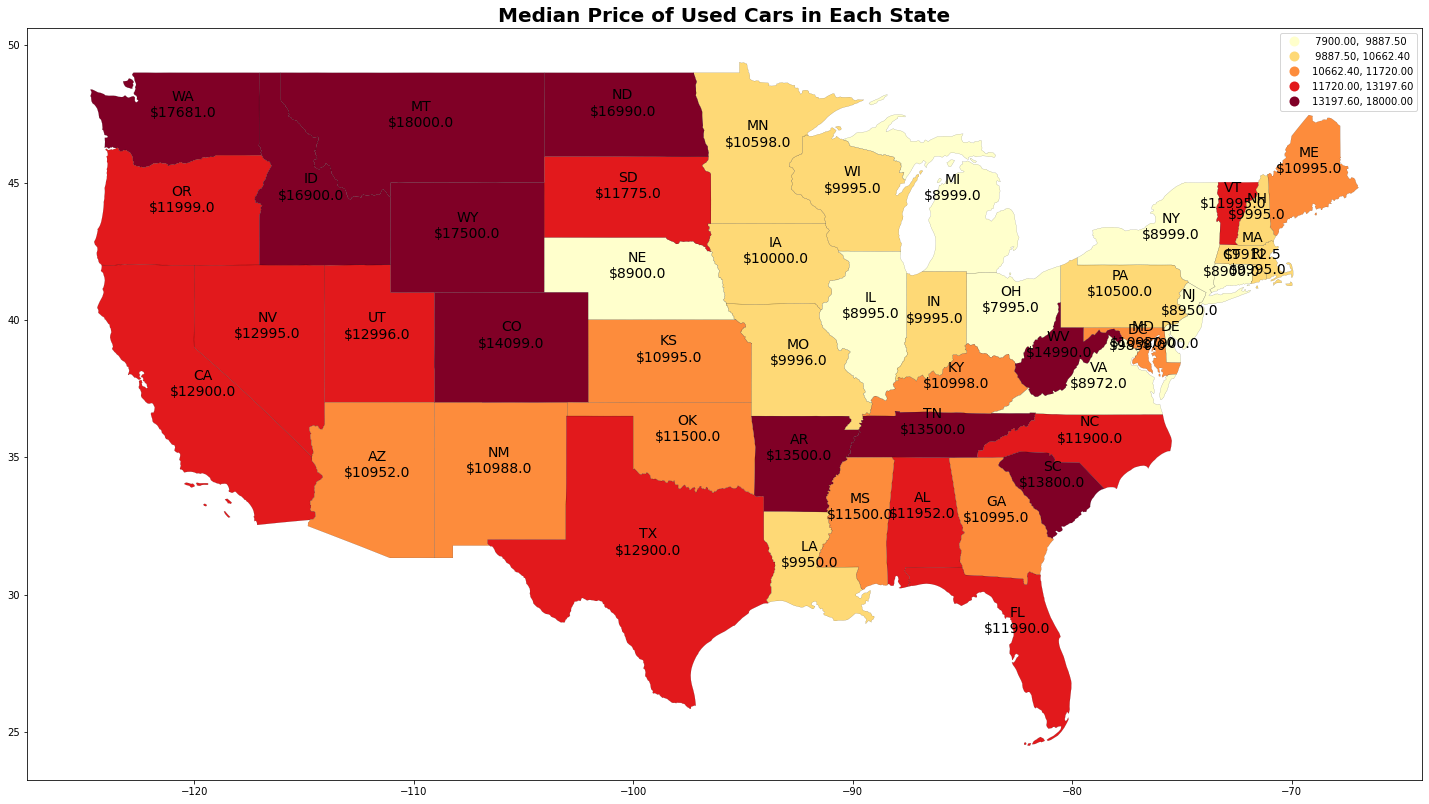

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
usa_mainland.apply(lambda x: ax.annotate(
    s=x.STUSPS + '\n' + '$' + str(x.median_price), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=14
),axis=1);
usa_mainland.boundary.plot(ax=ax,color='Black', linewidth=.1)
usa_mainland.plot(ax=ax,column='median_price',scheme='quantiles',cmap='YlOrRd', figsize=(25, 15),legend=True)
plt.title('Median Price of Used Cars in Each State',size=20, weight='bold')

Text(0.5, 1.0, 'Numbers of Used Cars in Each State')

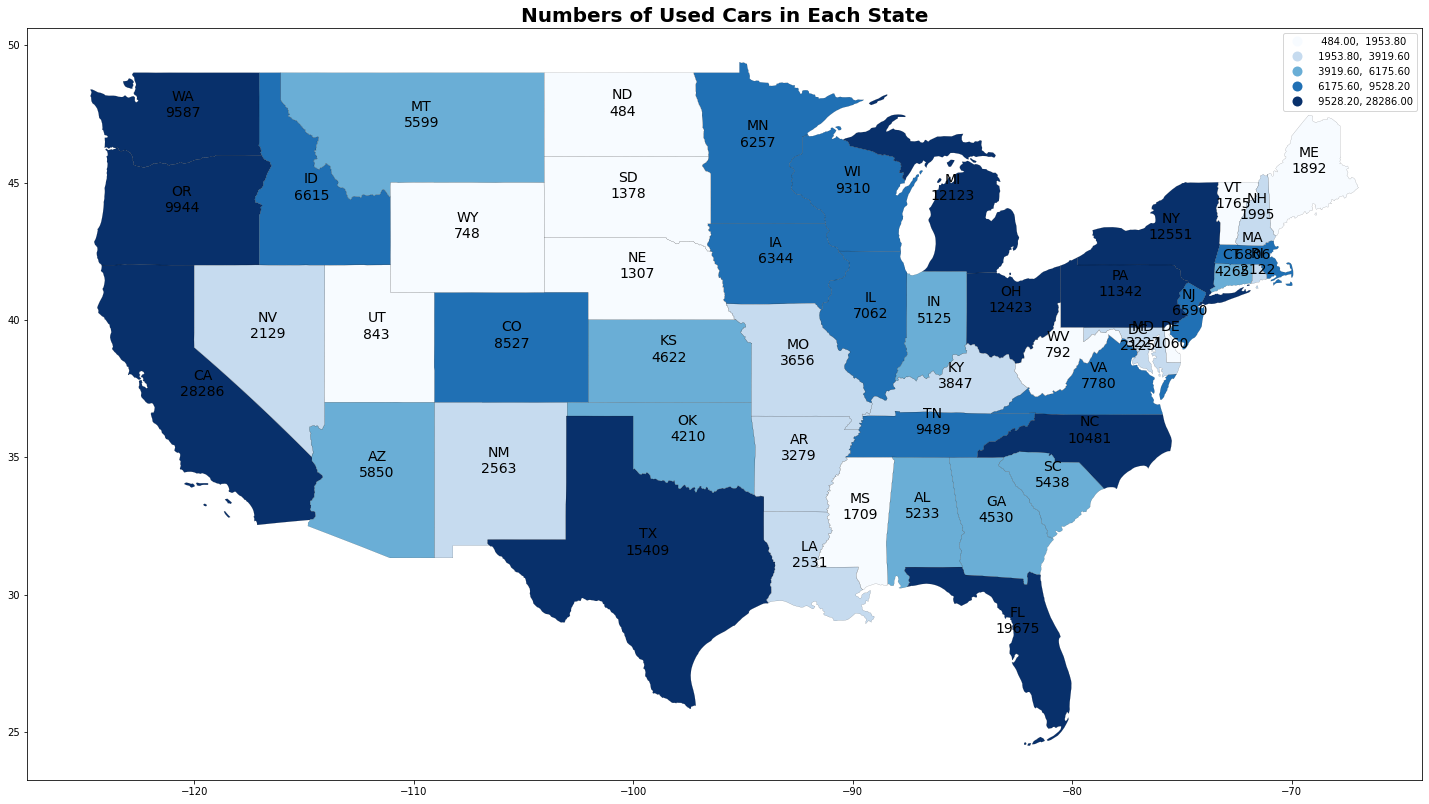

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
usa_mainland.apply(lambda x: ax.annotate(
    s=x.STUSPS + '\n' + str(x.countn), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=14
),axis=1);
usa_mainland.boundary.plot(ax=ax,color='Black', linewidth=.1)
usa_mainland.plot(ax=ax,column='countn',scheme='quantiles',cmap='Blues', figsize=(25, 15),legend=True)
plt.title('Numbers of Used Cars in Each State',size=20, weight='bold')

# **II. Multi-Variable**

In [ ]:
#Read clean data of used car
cars_2021 = pd.read_csv('/content/drive/MyDrive/EMSE 6574 Project/cleaned_data_2021.csv')
cars_2021.head()

Unnamed: 0  price  year manufacturer  ...       size    type paint_color state
0          27  33590  2014          gmc  ...        NaN  pickup       white    al
1          28  22590  2010    chevrolet  ...        NaN  pickup        blue    al
2          29  39590  2020    chevrolet  ...        NaN  pickup         red    al
3          30  30990  2017       toyota  ...        NaN  pickup         red    al
4          31  15000  2013         ford  ...  full-size   truck       black    al

[5 rows x 16 columns]

In [ ]:
cars_2021 = cars_2021.drop(columns='Unnamed: 0')

In [ ]:
le = preprocessing.LabelEncoder()
cars_2021_encoded = cars_2021[['manufacturer','model','cylinders','fuel','title_status','transmission','drive','size','type','paint_color','state']] = cars_2021[['manufacturer','model','cylinders','fuel','title_status','transmission','drive','size','type','paint_color','state']].apply(le.fit_transform)
cars_2021_encoded

manufacturer  model  cylinders  fuel  ...  size  type  paint_color  state
0                 13  19771          6     2  ...     4     8           10      1
1                  7  20126          6     2  ...     4     8            1      1
2                  7  20170          6     2  ...     4     8            8      1
3                 38  22819          6     2  ...     4     8            8      1
4                 12  11365          5     2  ...     1    10            0      1
...              ...    ...        ...   ...  ...   ...   ...          ...    ...
259957            30  15895          5     2  ...     4     9           12     50
259958            40  19151          8     2  ...     4     9            8     50
259959             6  24071          8     0  ...     4     4           10     50
259960            22  10454          5     2  ...     4     9            9     50
259961             4   2268          8     2  ...     4     3           12     50

[259962 rows x 11 columns]

In [ ]:
#Inorder to find the relationship between different variables, we should encoded the label into float first.
le = preprocessing.LabelEncoder()
cars_2021_encoded = pd.DataFrame.copy(cars_2021)
cars_2021_encoded[['manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color','state']] = cars_2021_encoded[['manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color','state']].apply(le.fit_transform)
cars_2021_encoded

price  year  manufacturer  model  ...  size  type  paint_color  state
0       33590  2014            13  19771  ...     4     8           10      1
1       22590  2010             7  20126  ...     4     8            1      1
2       39590  2020             7  20170  ...     4     8            8      1
3       30990  2017            38  22819  ...     4     8            8      1
4       15000  2013            12  11365  ...     1    10            0      1
...       ...   ...           ...    ...  ...   ...   ...          ...    ...
259957  23590  2019            30  15895  ...     4     9           12     50
259958  30590  2020            40  19151  ...     4     9            8     50
259959  34990  2020             6  24071  ...     4     4           10     50
259960  28990  2018            22  10454  ...     4     9            9     50
259961  30590  2019             4   2268  ...     4     3           12     50

[259962 rows x 15 columns]

In [ ]:
cars_2021

price  year  manufacturer  model  ... size  type  paint_color  state
0       33590  2014            13  19771  ...    4     8           10      1
1       22590  2010             7  20126  ...    4     8            1      1
2       39590  2020             7  20170  ...    4     8            8      1
3       30990  2017            38  22819  ...    4     8            8      1
4       15000  2013            12  11365  ...    1    10            0      1
...       ...   ...           ...    ...  ...  ...   ...          ...    ...
259957  23590  2019            30  15895  ...    4     9           12     50
259958  30590  2020            40  19151  ...    4     9            8     50
259959  34990  2020             6  24071  ...    4     4           10     50
259960  28990  2018            22  10454  ...    4     9            9     50
259961  30590  2019             4   2268  ...    4     3           12     50

[259962 rows x 15 columns]

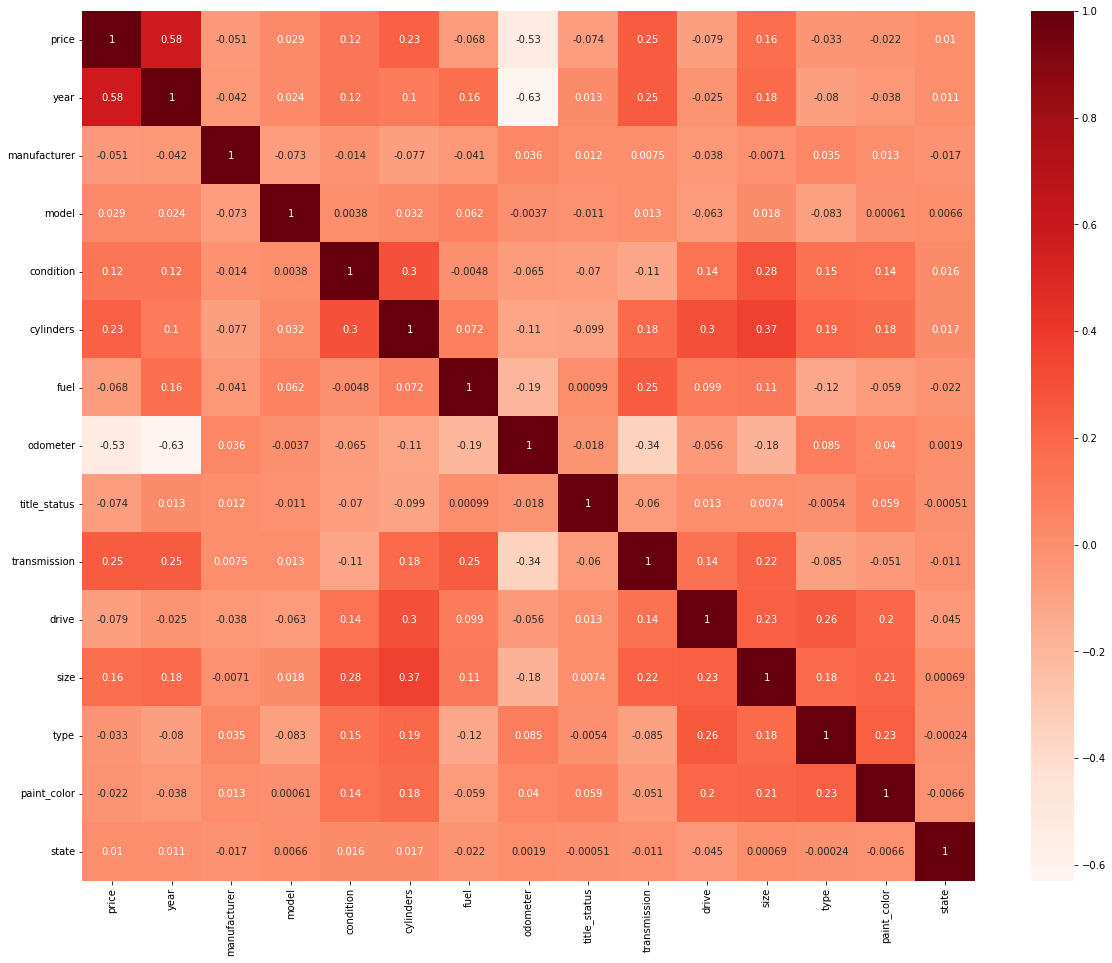

In [ ]:
#Then we draw a correlation heatmap
plt.figure(figsize=(20,16))
cor = cars_2021_encoded.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#From the heatmap, we can see that price have a strong relation to year and negative relation to odometer, which is reasonable. The transmission is also an important label related to price.

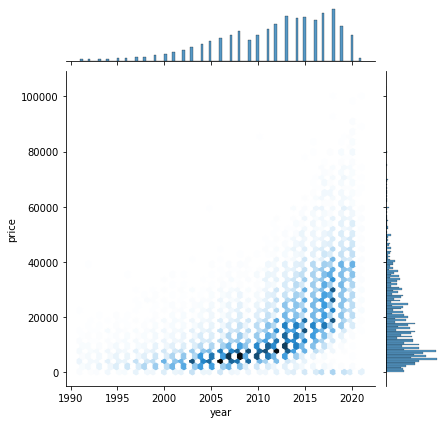

In [ ]:
#The dark area is the concentrated area of the data, the price rise as the year of the car increase.
sns.jointplot(x='year', y='price', data=cars_2021_encoded, kind='hex')
plt.show()

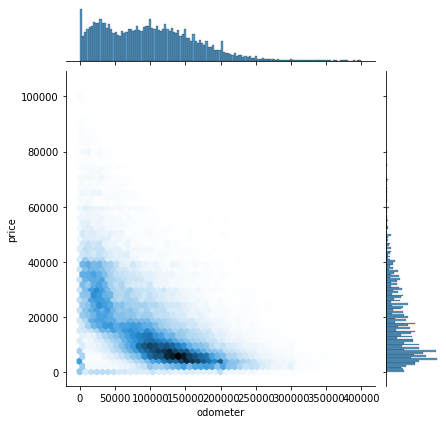

In [ ]:
#The relationship between odometer and price are opposite to the graph above.
sns.jointplot(x='odometer', y='price', data=cars_2021_encoded, kind='hex')
plt.show()

In [ ]:
#Effect of condition on paint_color
x = cars_2021.condition
y = cars_2021.paint_color
fig = go.Figure(go.Histogram2d(x=x,y=y))
fig.update_layout(autosize=False,width=700,height=500,margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="Silver",
)

fig.show()

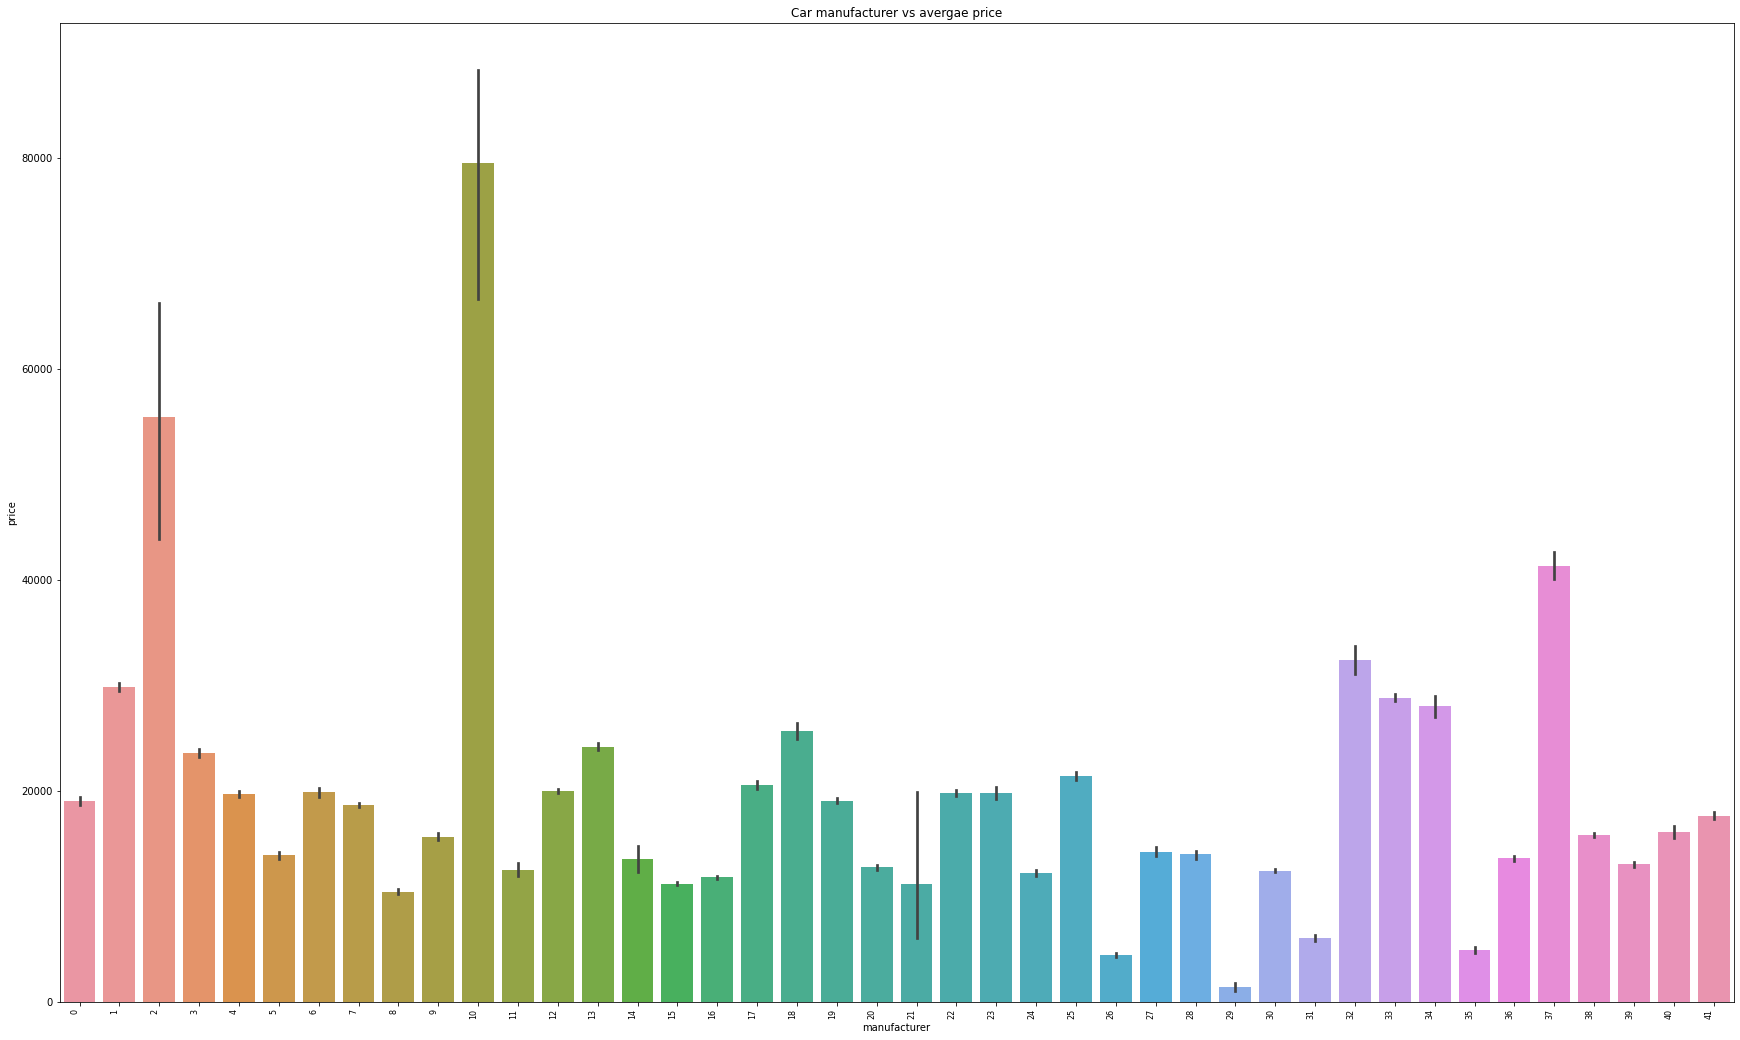

In [ ]:
plt.figure(figsize=(30,18))
ax = sns.barplot(x='manufacturer', y='price', data=cars_2021);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.xlabel('manufacturer')
plt.ylabel('price')
plt.title("Car manufacturer vs avergae price");

Text(0.5, 0.98, 'Price of Different Transmissions with Various Fuel Types')

<Figure size 2160x1296 with 0 Axes>

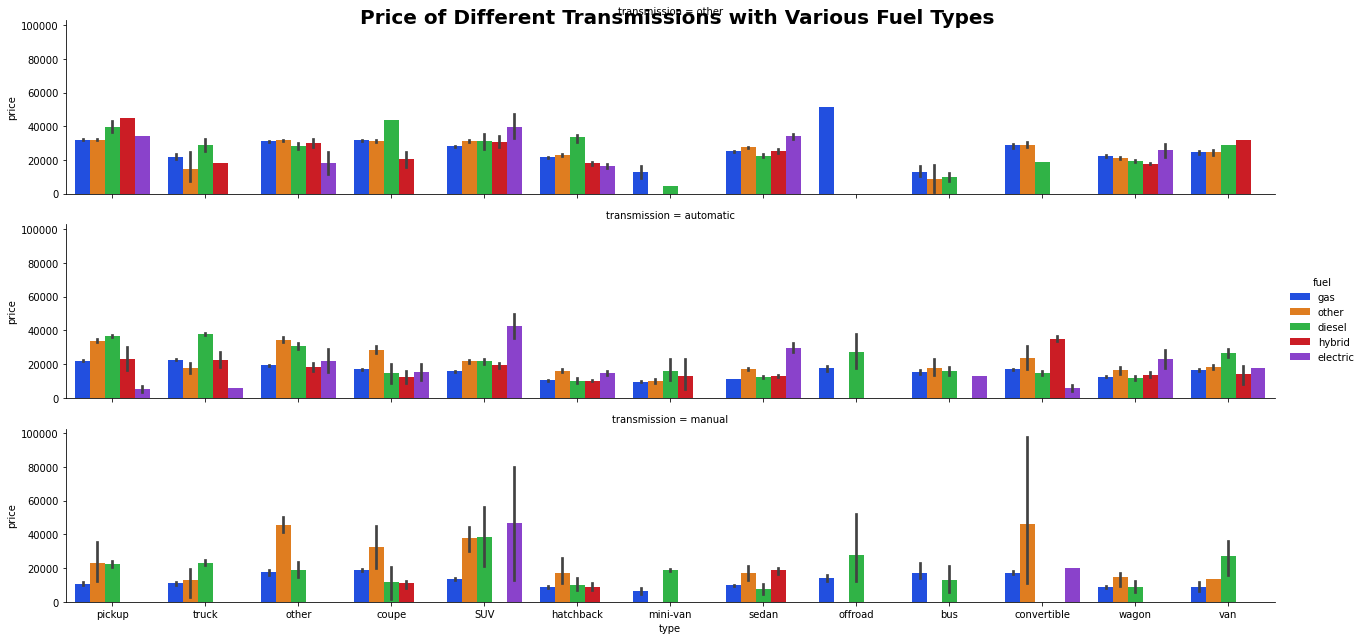

In [ ]:
#Try to find difference in different car types with various transmission(Other and Unknown have good performance...)
rel = sns.catplot(x='type', y ='price', hue='fuel', col='transmission', data=cars_2021, kind="bar", aspect=6, height=3,  palette="bright", col_wrap=1)
rel.fig.suptitle('Price of Different Transmissions with Various Fuel Types',ha='center',size=20,weight='bold')

In [ ]:
cars_2021_agg = cars_2021.groupby('manufacturer', as_index=False).agg({'price': 'sum'})
boba_graph = cars_2021_agg.sort_values(by=['price'])
boba_graph

manufacturer      price
29            29       2800
21            21     111133
2              2     832249
14            14    1375760
10            10    2067767
26            26    3235023
35            35    3886974
11            11    6422933
31            31    8300234
1              1   14795749
37            37   20866835
27            27   23025833
32            32   26857541
28            28   29135498
18            18   32436356
40            40   35882663
34            34   39330400
8              8   41942346
24            24   42722421
5              5   46776250
23            23   51505250
17            17   63618060
20            20   66575968
0              0   72966055
16            16   76328250
39            39   76492104
6              6   85362947
36            36   91947689
22            22  105312865
3              3  117493735
9              9  124752122
25            25  145884901
41            41  149879482
30            30  152917749
15            15  165684829
4              4  178171510
19            19  218231438
13            13  237571558
33            33  291115916
38            38  347313680
7              7  588954759
12            12  840912632

In [ ]:
boba_graph.to_csv('./drive/MyDrive/boba_graph.csv')

# **III. Comparison: 2020 VS 2021**

In [ ]:
cars_20 = pd.read_csv('/content/drive/MyDrive/EMSE 6574 Project/cleaned_data_2020.csv')
cars_20.head()

Unnamed: 0  price  year manufacturer  ... size   type paint_color state
0           0  10299  2012        acura  ...  NaN  other        blue    nc
1           2   9500  2011       jaguar  ...  NaN    NaN        blue    nc
2           3   3995  2004        honda  ...  NaN    SUV      orange    nc
3           5  12995  2015          kia  ...  NaN  wagon         NaN    nc
4           6  10995  2014    chevrolet  ...  NaN    SUV       black    nc

[5 rows x 16 columns]

In [ ]:
cars_21 = pd.read_csv('/content/drive/MyDrive/EMSE 6574 Project/cleaned_data_2021.csv')
cars_21.head()

Unnamed: 0  price  year manufacturer  ...       size    type paint_color state
0          27  33590  2014          gmc  ...        NaN  pickup       white    al
1          28  22590  2010    chevrolet  ...        NaN  pickup        blue    al
2          29  39590  2020    chevrolet  ...        NaN  pickup         red    al
3          30  30990  2017       toyota  ...        NaN  pickup         red    al
4          31  15000  2013         ford  ...  full-size   truck       black    al

[5 rows x 16 columns]

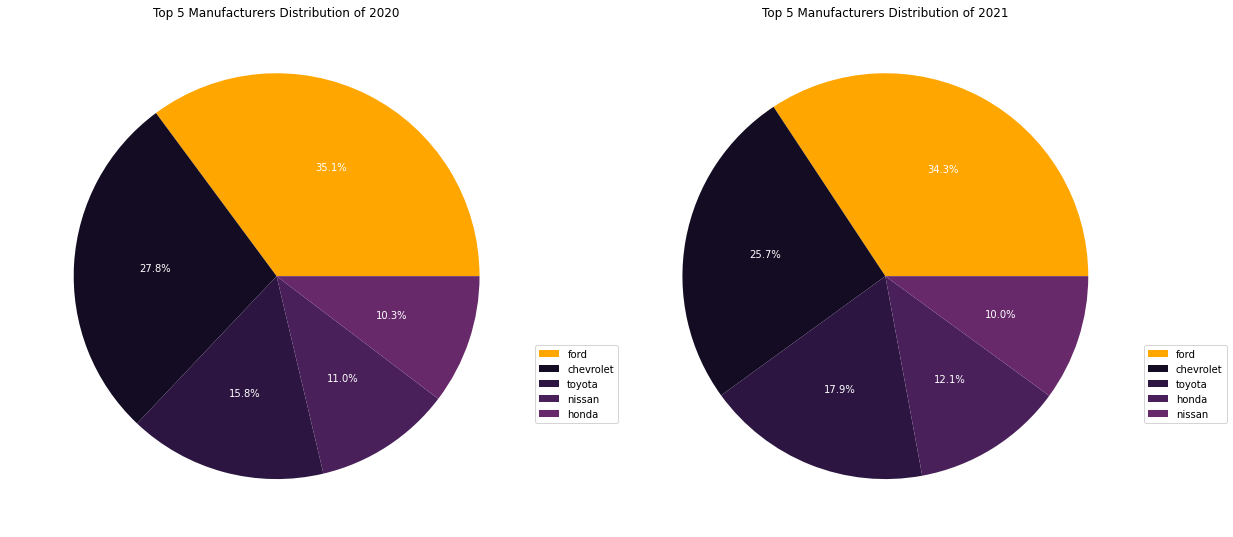

In [ ]:
# extracting frequency of top 10 manufacturers
data_20 = list(cars_20['manufacturer'].value_counts()[0:5])
data_21 = list(cars_21['manufacturer'].value_counts()[0:5])

labels_20= list(cars_20['manufacturer'].value_counts().index[0:5])
labels_21= list(cars_21['manufacturer'].value_counts().index[0:5])

color = ['#ffa600','#130c23','#2c1641','#49205a','#68296b','#863576','#a2437c','#b9537e','#cc6680','#e17c83','#e5ac93','#e8c4a4','#ecdbbd','#f2eedb']
plt.figure(figsize =(20,10))

plt.subplot(1,2,1)
# visualizing distribution of manufacturers on 2020
plt.pie(data_20, labels=labels_20,autopct='%1.1f%%',colors=color,textprops={'color':'w'},pctdistance=0.6)
plt.title("Top 5 Manufacturers Distribution of 2020")
plt.legend(bbox_to_anchor=(1,0.2),loc=3)

plt.subplot(1,2,2)
# visualizing distribution of manufacturers on 2021
plt.pie(data_21, labels=labels_21,autopct='%1.1f%%',colors=color,textprops={'color':'w'},pctdistance=0.6)
plt.title("Top 5 Manufacturers Distribution of 2021")
plt.legend(bbox_to_anchor=(1,0.2),loc=3)

plt.show()

The Top 3 car manufacturers remain the same , whereas Honda beat Nissan in the year 2021 . Although Ford , Chevrolet and Toyota remain to be the Top 3 , there is dip in market share of Ford and Chevrolet while there is an increase in Toyota's market share . 

In [ ]:
# extracting data for the top 5 car brands 
cars_20_fil=cars_20[[x in labels_20[0:5] for x in cars_20['manufacturer']]]
cars_21_fil=cars_21[[x in labels_21[0:5] for x in cars_21['manufacturer']]]

cars_20_fil.loc[:,'year']='2020'
cars_21_fil.loc[:,'year']='2021'

aa=cars_20_fil.append(cars_21_fil)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


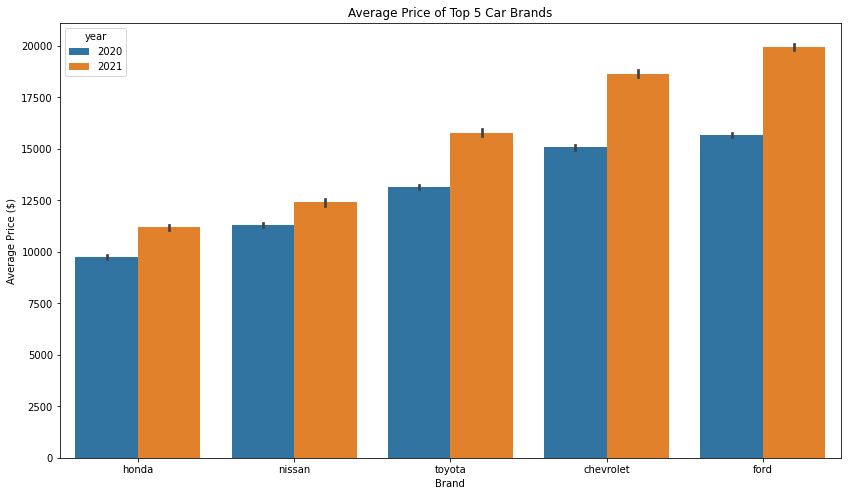

In [ ]:
# Visualizing Average price of Manufacturers over the two years 
plt.figure(figsize=(14,8))
sns.barplot(x='manufacturer',y='price',hue='year',data=aa,estimator=np.mean,order=reversed(labels_20))
plt.title('Average Price of Top 5 Car Brands')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.show()

It can seen that the average price of car for the Top 5 brands have increased . We can see a drastic rise in average car prices of Ford and Chevrolet , which could be reason behind the dip in market share in 2021 for Ford and Chevrolet .

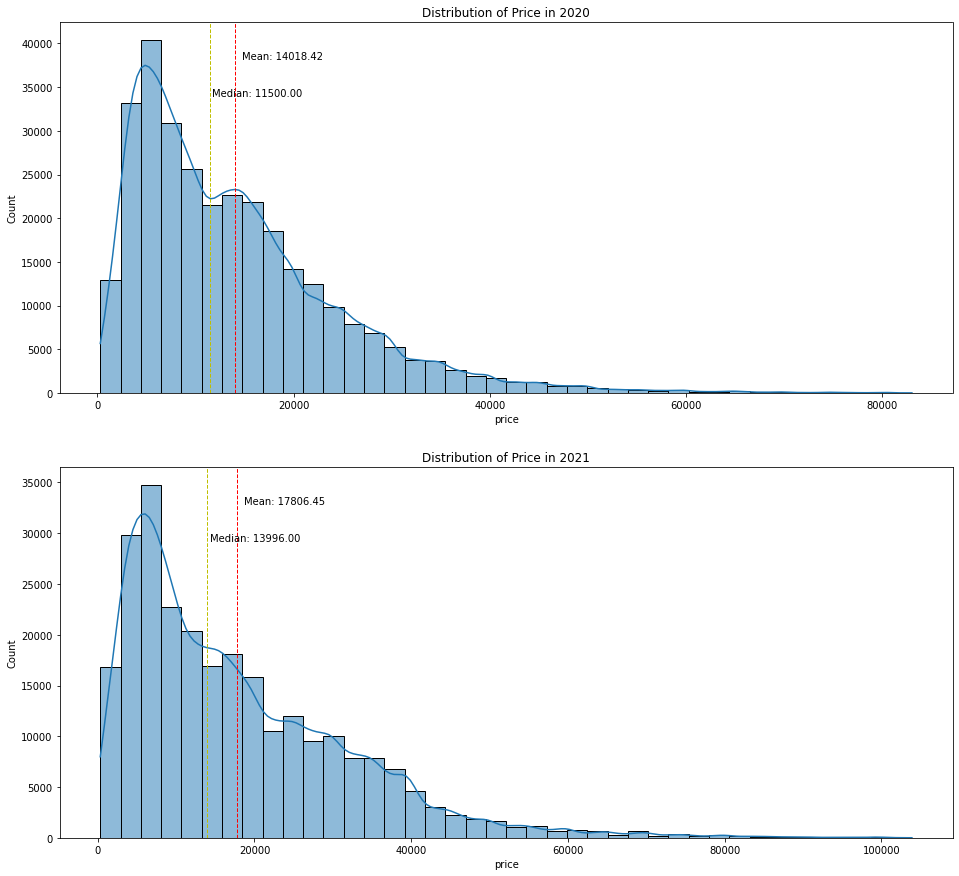

In [ ]:
# visualizing the price distribution , mean and median and compare over 2020 and 2021
plt.figure(figsize=(16,15))

plt.subplot(2,1,1)
pmean_20=cars_20['price'].mean()
pmedian_20=cars_20['price'].median()
sns.histplot(x='price',data=cars_20,bins=40,kde=True)
plt.axvline(pmean_20, color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(pmean_20*1.05, max_ylim*0.9, 'Mean: {:.2f}'.format(pmean_20))
plt.axvline(pmedian_20, color='y', linestyle='dashed', linewidth=1)
plt.text(pmedian_20*1.02, max_ylim*0.8, 'Median: {:.2f}'.format(pmedian_20))
plt.title('Distribution of Price in 2020')

plt.subplot(2,1,2)
pmean_21=cars_21['price'].mean()
pmedian_21=cars_21['price'].median()
sns.histplot(x='price',data=cars_21,bins=40,kde=True)
plt.axvline(pmean_21, color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(pmean_21*1.05, max_ylim*0.9, 'Mean: {:.2f}'.format(pmean_21))
plt.axvline(pmedian_21, color='y', linestyle='dashed', linewidth=1)
plt.text(pmedian_21*1.02, max_ylim*0.8, 'Median: {:.2f}'.format(pmedian_21))
plt.title('Distribution of Price in 2021')
plt.show()

The average price of a car increased from \$14018 to \$17806 from year 2020 to 2021. Similary median price of a car has increased from \$11500 to \$13996 from year 2020 to 2021 . Quite evidently , the price has increased over the 1 year indicating that the sale of expensive and luxurious cars have increased , or the market rate of cars have themselves gone up due to market inflation. The numbers also indicate that sale of worth more than $25000 have increased , thus increasing the average and median car price .

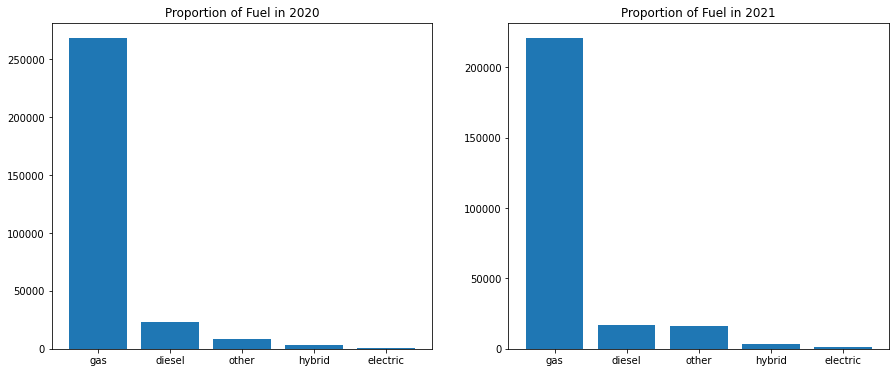

In [ ]:
# extracting frequency of car fuel types 
data_20 = list(cars_20['fuel'].value_counts())
data_21 = list(cars_21['fuel'].value_counts())

labels_20= list(cars_20['fuel'].value_counts().index)
labels_21= list(cars_21['fuel'].value_counts().index)
plt.figure(figsize=(15,6))

# visualizing the distribution of fuel types using a bar graph 
plt.subplot(1,2,1)
plt.bar(labels_20,height=data_20)
plt.title('Proportion of Fuel in 2020')
plt.subplot(1,2,2)
plt.bar(labels_21,height=data_21)
plt.title('Proportion of Fuel in 2021')

plt.show()


In [ ]:
# extracting data specific to Gasoline and Electric powered cars
fuel_data_20 = {ful:freq for ful,freq in zip(labels_20,data_20)}
fuel_data_21 = {ful:freq for ful,freq in zip(labels_21,data_21)}

fuel_20={}
fuel_21={}

fuel_20['Gasoline']=fuel_data_20['gas']+fuel_data_20['diesel']
fuel_21['Gasoline']=fuel_data_21['gas']+fuel_data_21['diesel']

fuel_20['Electric']=fuel_data_20['electric']+fuel_data_20['hybrid']
fuel_21['Electric']=fuel_data_21['electric']+fuel_data_21['hybrid']

data_20=list(fuel_20.values())
data_21=list(fuel_21.values())

labels_20=list(fuel_20.keys())
labels_21=list(fuel_21.keys())

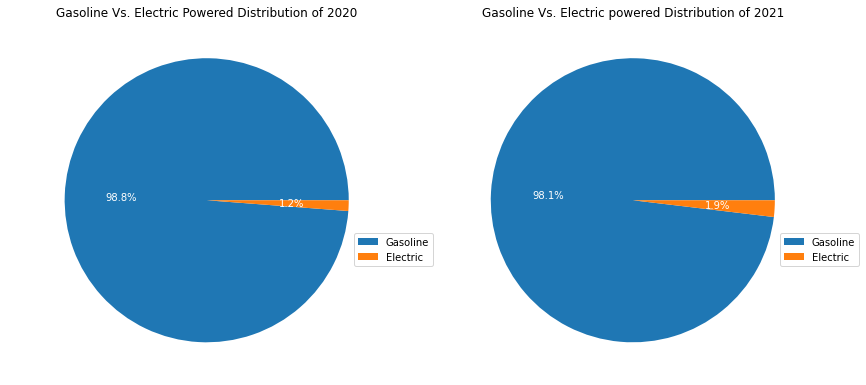

In [ ]:
plt.figure(figsize =(14,10))

plt.subplot(1,2,1)
# visualizing distribution of manufacturers over 2020
plt.pie(data_20, labels=labels_20,autopct='%1.1f%%',textprops={'color':'w'},pctdistance=0.6)
plt.title("Gasoline Vs. Electric Powered Distribution of 2020")
plt.legend(bbox_to_anchor=(0.9,0.3),loc=3)

plt.subplot(1,2,2)
# visualizing distribution of manufacturers over 2021
plt.pie(data_21, labels=labels_21,autopct='%1.1f%%',textprops={'color':'w'},pctdistance=0.6)
plt.title("Gasoline Vs. Electric powered Distribution of 2021")
plt.legend(bbox_to_anchor=(0.9,0.3),loc=3)

plt.show()

In [ ]:
print("Gasoline Vs. Electric fuel proportion (2020): ",fuel_20['Gasoline']/fuel_20['Electric'])
print("Gasoline Vs. Electric fuel proportion (2021): ",fuel_21['Gasoline']/fuel_21['Electric'])

Gasoline Vs. Electric fuel proportion (2020):  81.76761156328936
Gasoline Vs. Electric fuel proportion (2021):  52.06529360210342


For Gasoline Powered cars we considered both gas and diesel in that category , and for electric cars we considered both electric and hybrid cars. 

The Gasoline vs Electric proportion has decreased from 2020 to 2021 by almost 2 times.This is a strong indication that , the Sales of Gasolin-powered cars have declined whereas Electric vehicles have taken a steep rise in terms of sales. 